In [73]:
import os
import sys
import matplotlib.pyplot as plt

# Definimos la Clase base "RamanSpectra" que debera contener información relacionada con la medicion
# TODO: Podemos añadir un mapeo de intensidades para caracterizar la superficie de medicion
# TODO: Añadir otros parametros de informacion para la muestra o espectro

class RamanSpectra(object):
    """
    RamanSpectra es un objeto que contiene los puntos de una medicion, es decir, 
    el objeto tiene un atributo correspondiente al eje x & otro para el eje y asi 
    como dos atributos mas para la información de la medición
    """

    def __init__(self, pathFile, upLevels = 0):
        self.readFromLocation(pathFile, upLevels)
        return;
    
    def __str__(self):
        return 'raman_s at +++ ' + self.r_id;

    def __repr__(self):
        return 'raman_s at ... ' + self.r_id;
    
    def readFromLocation(self, pathFile, upLevels):
        count = 0
        initialPath = os.getcwd().split('/')[1:]
        # TODO: Raise error when upLevels > treeDepth
        while count  < upLevels:
            initialPath.pop()
            count +=1
        docLoc = '/'+ '/'.join(initialPath)+pathFile

        with open(docLoc, 'r', encoding = 'unicode_escape') as tempfile:
                self.content = tempfile.read()
                self.info    = self.content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                self.values  = self.content.split('#Acquired')[1].split('\n')[1:-1]
                self.spx=[]
                self.spy=[]
                for string_values in self.values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    self.spx.append(x)
                    self.spy.append(y)
        return;
    
    
    def plot(self, darkMode=True):
        if darkMode:
            with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.facecolor':'1D0B3A'}):
                fig, ax = plt.subplots()
                ax.plot(self.spx, self.spy)
                ax.set_title(self.info)
        else:
            fig, ax = plt.subplots()
            ax.plot(self.spx, self.spy)
            ax.set_title(self.info)
    
    def altPlot(self,xlim=4001,ylim=4001):
        with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
            fig, ax = plt.subplots()
            fig.set_size_inches(16,8)
            ax.plot(self.spx, self.spy,color = 'red', linewidth = 0.8)
            plt.fill_between(self.spx,self.spy, color='g', alpha=0.4)
            plt.ylim([0, ylim])
            plt.xlim([0, xlim])
            plt.xlabel('Raman Shift')
            plt.ylabel(r'$Normal \: Text$', fontsize=20)
            ax.set_title(self.info)

            major_ticks = np.arange(0, xlim, 500)
            minor_ticks = np.arange(0, xlim, 100)
            ax.set_yticks(major_ticks)
            ax.set_yticks(minor_ticks, minor=True)
            ax.set_xticks(major_ticks)
            ax.set_xticks(minor_ticks, minor=True)
            # Or if you want different settings for the grids:
            ax.grid(which='minor', alpha=0.4)
            ax.grid(which='major', alpha=0.8)

            plt.savefig('test.jpeg',dpi=900)

In [74]:
p = RamanSpectra('/PR6S1E_01.txt')

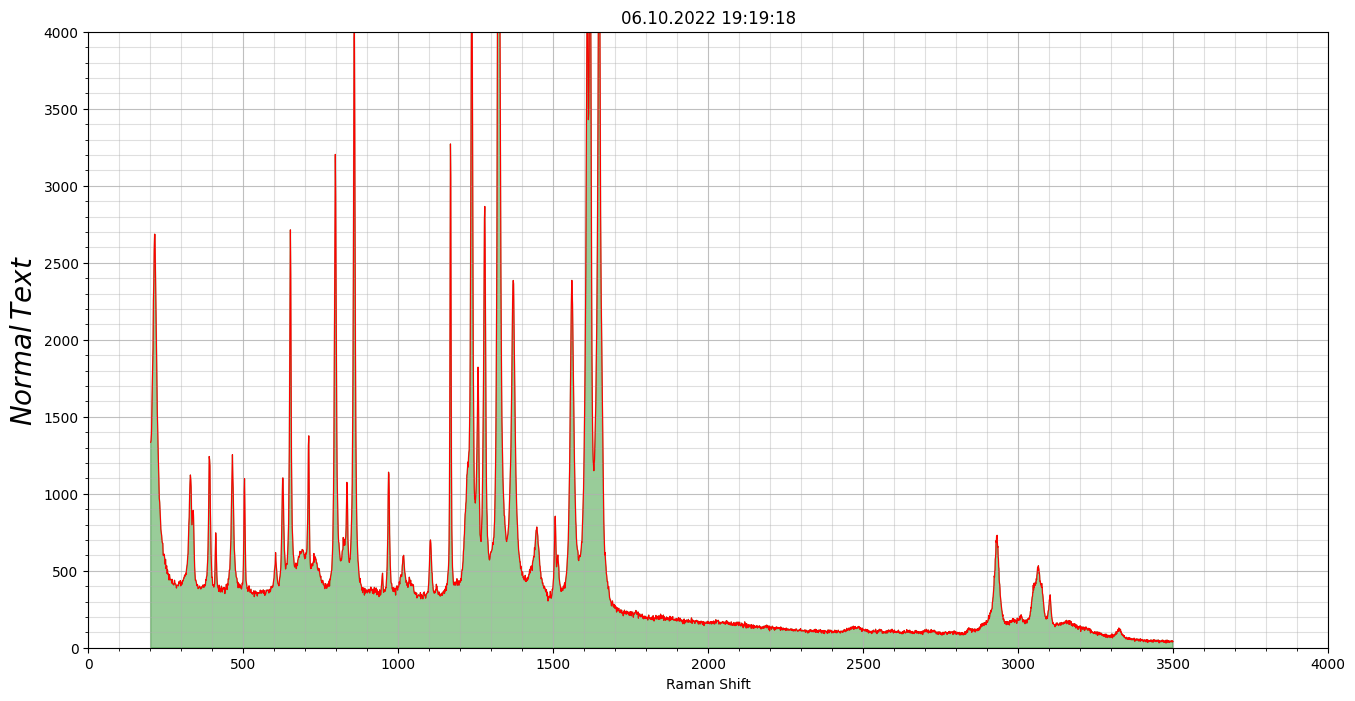

In [75]:
p.altPlot()

In [26]:
s = RamanSpectra('/BaseLine/fil.txt',upLevels=1)

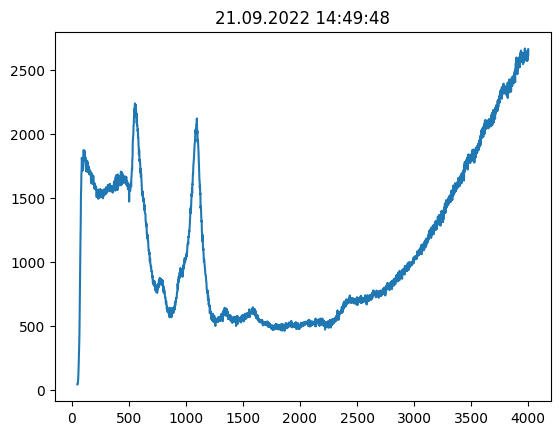

In [28]:
s.plot(darkMode =False)

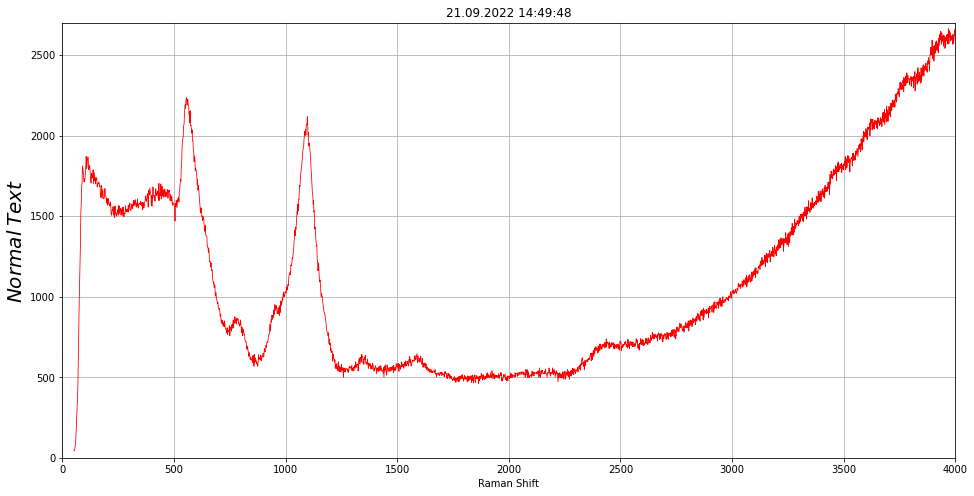

In [3]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)
    ax.plot(s.spx, s.spy,color = 'red', linewidth = 0.8)
    plt.ylim([0, 2700])
    plt.xlim([0, 4000])
    plt.xlabel('Raman Shift')
    plt.ylabel(r'$Normal \: Text$', fontsize=20)
    ax.set_title(s.info)
    ax.grid(axis='both', which='both')
    plt.savefig('test.jpeg',dpi=900)

In [29]:
nueva_var = 5

In [30]:
nueva_var.real

5

In [34]:
cadena = 'hoa mundo'

In [35]:
cadena.capitalize()

'Hoa mundo'

In [37]:
type(s)

__main__.RamanSpectra

In [39]:
type(s.spx)

list

In [41]:
s.spx[0]

51.0918

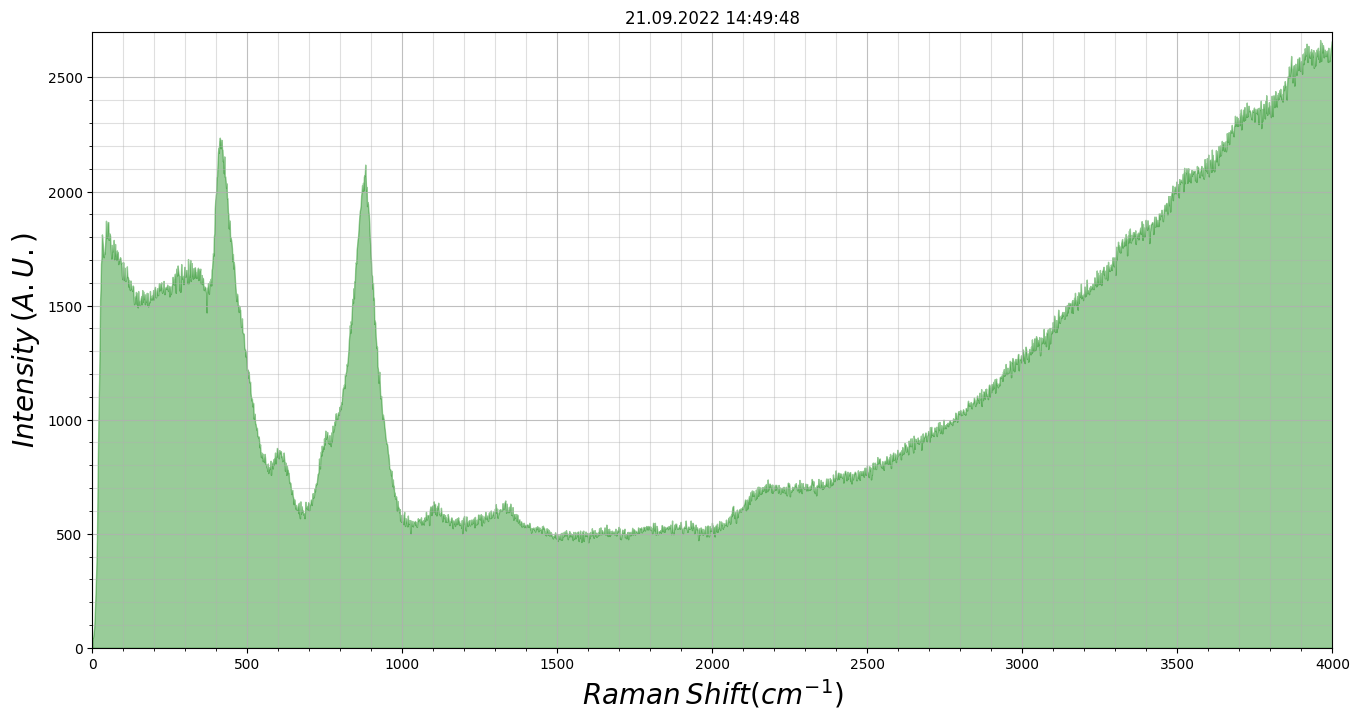

In [44]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np


with plt.rc_context({'xtick.color':'black', 'ytick.color':'black'}):
    fig, ax = plt.subplots()
    fig.set_size_inches(16,8)

    base = np.linspace(0,4000,2737)
    plt.fill_between(base,s.spy, color='g', alpha=0.4)

    plt.ylim([0, 2700])
    plt.xlim([0, 4000])
    plt.xlabel(r'$Raman \: Shift (cm^{-1})$', fontsize=20)
    plt.ylabel(r'$Intensity \: (A.U.)$', fontsize=20)
    ax.set_title(s.info)

    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 2501, 500)
    minor_ticks = np.arange(0, 2501, 100)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.4)
    ax.grid(which='major', alpha=0.8)

    ax.xaxis.set_minor_locator(MultipleLocator(100))
    plt.savefig('test.jpeg',dpi=900)

In [15]:
s.spy[0:300]

[44.0,
 44.0,
 52.0,
 72.0,
 90.0,
 134.0,
 192.0,
 246.0,
 310.0,
 378.0,
 476.0,
 644.0,
 828.0,
 968.0,
 1086.0,
 1200.0,
 1328.0,
 1524.0,
 1576.0,
 1684.0,
 1708.0,
 1812.0,
 1794.0,
 1766.0,
 1730.0,
 1712.0,
 1732.0,
 1728.0,
 1766.0,
 1804.0,
 1872.0,
 1796.0,
 1808.0,
 1850.0,
 1866.0,
 1866.0,
 1788.0,
 1794.0,
 1816.0,
 1806.0,
 1760.0,
 1728.0,
 1706.0,
 1766.0,
 1738.0,
 1738.0,
 1756.0,
 1788.0,
 1702.0,
 1732.0,
 1770.0,
 1720.0,
 1736.0,
 1700.0,
 1742.0,
 1728.0,
 1734.0,
 1682.0,
 1704.0,
 1700.0,
 1700.0,
 1712.0,
 1706.0,
 1684.0,
 1690.0,
 1632.0,
 1616.0,
 1638.0,
 1690.0,
 1612.0,
 1636.0,
 1666.0,
 1610.0,
 1608.0,
 1612.0,
 1624.0,
 1672.0,
 1628.0,
 1626.0,
 1618.0,
 1582.0,
 1610.0,
 1574.0,
 1568.0,
 1610.0,
 1588.0,
 1574.0,
 1572.0,
 1564.0,
 1588.0,
 1584.0,
 1530.0,
 1506.0,
 1514.0,
 1540.0,
 1536.0,
 1560.0,
 1544.0,
 1506.0,
 1556.0,
 1492.0,
 1564.0,
 1520.0,
 1522.0,
 1504.0,
 1500.0,
 1522.0,
 1534.0,
 1542.0,
 1506.0,
 1568.0,
 1516.0,
 1562.0,
 1

(0.0, 2000.0)

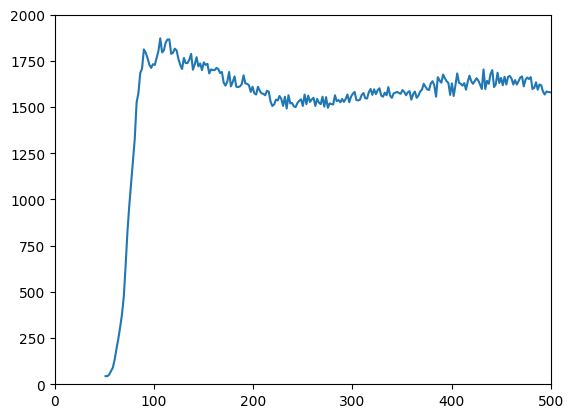

In [23]:
plt.plot(s.spx[0:250],s.spy[0:250])
plt.xlim([0,500])
plt.ylim([0,2000])

In [43]:
s.spx[0:50]

[51.0918,
 52.9354,
 54.7807,
 56.6235,
 58.4681,
 60.3102,
 62.154,
 63.9954,
 65.8385,
 67.6792,
 69.5216,
 71.3615,
 73.2032,
 75.0424,
 76.8834,
 78.7218,
 80.5621,
 82.3998,
 84.2393,
 86.0764,
 87.9152,
 89.7515,
 91.5874,
 93.4251,
 95.2603,
 97.0973,
 98.9318,
 100.766,
 102.602,
 104.435,
 106.27,
 108.103,
 109.936,
 111.77,
 113.601,
 115.433,
 117.266,
 119.096,
 120.926,
 122.758,
 124.588,
 126.417,
 128.246,
 130.076,
 131.904,
 133.732,
 135.561,
 137.388,
 139.215,
 141.041]

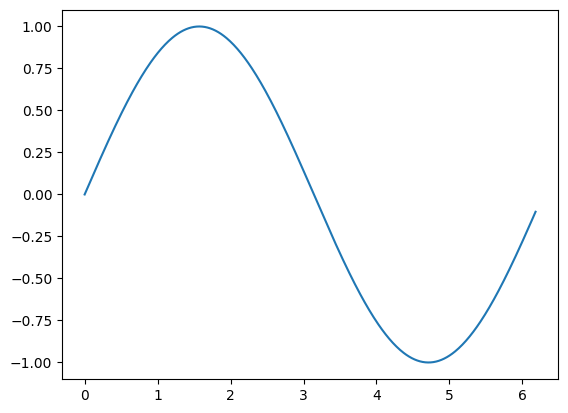

In [25]:
x = np.linspace(0,6.18,500)
y = np.sin(x)
plt.plot(x,y)